# Урок 2: Работа с пространственными данными в Python

## 2.1. Работа с пространственными форматами данных

### Пример 1: Загрузка Shapefile

In [1]:
import geopandas as gpd

# Загрузка Shapefile с границами стран
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Вывод информации о наборе данных
world.head()

C:\Users\k.valiev\AppData\Local\Temp\ipykernel_32596\827375539.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Пример 2: Загрузка GeoJSON

In [3]:
# Загрузка GeoJSON с помощью GeoPandas
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
world_geojson = gpd.read_file(url)

# Вывод первых строк данных
world_geojson.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


### Пример 3: Загрузка данных в формате WKT

In [5]:
from shapely import wkt

# Пример геометрии в формате WKT
wkt_string = "POINT (30 10)"
geometry = wkt.loads(wkt_string)

# Создание GeoDataFrame с геометрией
gdf = gpd.GeoDataFrame([{'geometry': geometry}], crs="EPSG:4326")
gdf

,geometry
0,POINT (30.00000 10.00000)


<Axes: >

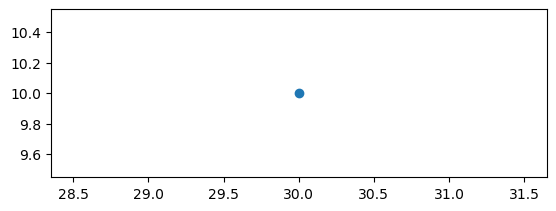

In [6]:
gdf.plot()

## 2.2. Основные операции с GeoDataFrame

### 2.2.1. Выборка данных на основе атрибутов

In [10]:
# Выбор стран с населением более 100 миллионов
large_countries = world[world['pop_est'] > 100000000]
large_countries[['name', 'pop_est']].head()

,name,pop_est
4,United States of America,328239523.0
8,Indonesia,270625568.0
18,Russia,144373535.0
27,Mexico,127575529.0
29,Brazil,211049527.0


### 2.2.2. Фильтрация по гео-признакам (пространственная фильтрация)

In [11]:
# Загрузка набора данных
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.head()

C:\Users\k.valiev\AppData\Local\Temp\ipykernel_32596\3808451937.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


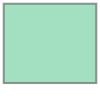

In [12]:
# Определение полигона для фильтрации (например, прямоугольник)
from shapely.geometry import box

bbox = box(minx=-20, maxx=50, miny=-30, maxy=30)
bbox

In [13]:
# Фильтрация стран, попадающих в этот полигон
filtered = gdf[gdf.intersects(bbox)]
filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
14,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
25,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
26,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257..."
48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


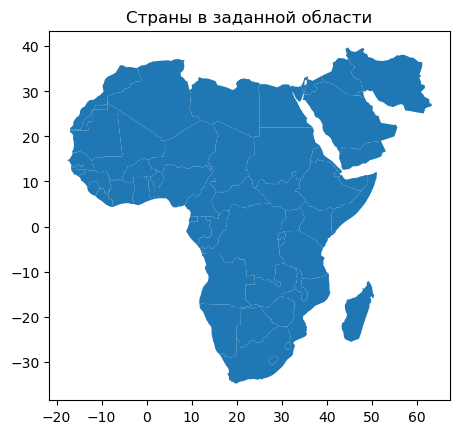

In [15]:
import matplotlib.pyplot as plt

# Визуализация выбранных стран
filtered.plot()
plt.title("Страны в заданной области")
plt.show()

## 2.3. Пространственные операции

### 2.3.1. Пересечения (intersects)

In [16]:
from shapely.geometry import Point

# Точка для пересечения
point = Point(10, 52)

# Находим страны, которые пересекаются с этой точкой
intersecting_countries = world[world.intersects(point)]
intersecting_countries[['name', 'geometry']]

,name,geometry
121,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


### 2.3.2. Буферизация (buffer)

Буферизация позволяет создавать области вокруг геометрий с заданным радиусом.

In [17]:
# Создание буфера вокруг геометрии
world['buffered'] = world.geometry.buffer(2)

C:\Users\k.valiev\AppData\Local\Temp\ipykernel_32596\280715015.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['buffered'] = world.geometry.buffer(2)


<Axes: >

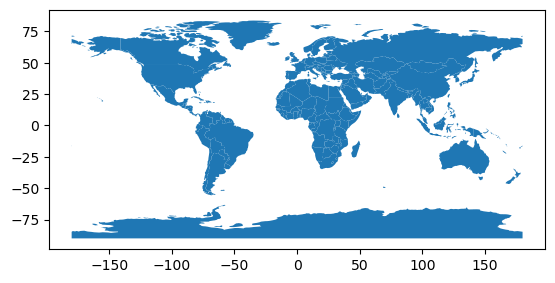

In [20]:
world.plot()

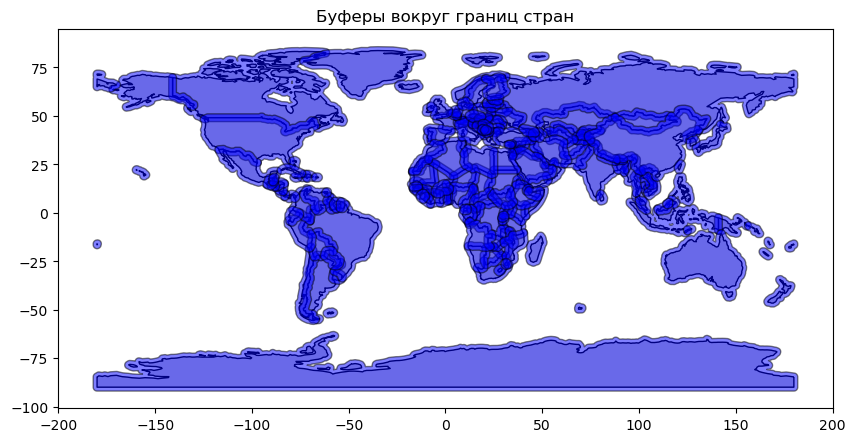

In [25]:
# Визуализация буферов
fig, ax = plt.subplots(figsize=(10, 10))

# Визуализируем страны
world.plot(ax=ax, facecolor="lightgray", edgecolor="black")

# Визуализируем буферы, добавляем их поверх стран
world['buffered'].plot(ax=ax, facecolor="blue", edgecolor="black", alpha=0.5)

plt.title("Буферы вокруг границ стран")
plt.show()

### 2.3.3. Объединение геометрий (union)

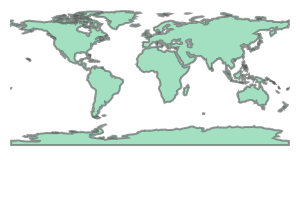

In [23]:
# Объединение всех геометрий в одну
merged_geometry = world.unary_union
merged_geometry

### 2.3.4. Разница (difference)

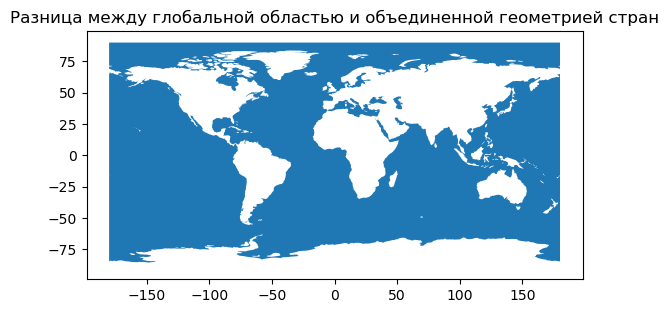

In [24]:
# Создание полигона для вычитания
from shapely.geometry import Polygon

polygon = Polygon([(-180, -90), (-180, 90), (180, 90), (180, -90)])

# Вычисление разности между двумя геометриями
difference = polygon.difference(merged_geometry)

# Визуализация результата
gpd.GeoSeries([difference]).plot()
plt.title("Разница между глобальной областью и объединенной геометрией стран")
plt.show()

## 2.4. Преобразования систем координат (CRS)

#### Пример: Преобразование в другую систему координат

In [26]:
# Текущая система координат (WGS 84)
print(world.crs)

EPSG:4326


In [28]:
# Преобразование в систему координат UTM (зона 33N)
world_utm = world.to_crs(epsg=32633)

# Вывод новой системы координат
print(world_utm.crs)

EPSG:32633


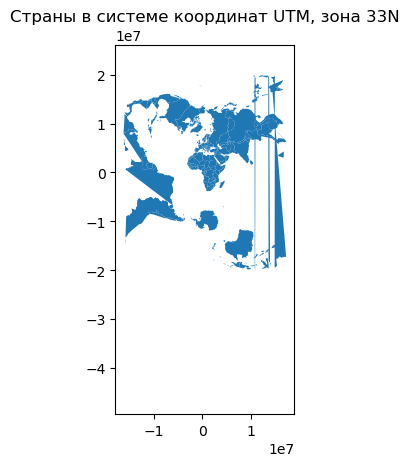

In [29]:
# Визуализация данных в новой системе координат
world_utm.plot()
plt.title("Страны в системе координат UTM, зона 33N")
plt.show()

## 2.5. Объединение пространственных данных

In [30]:
# Создание второго набора данных с дополнительными атрибутами
additional_data = gpd.GeoDataFrame({
    'name': ['Russia', 'China'],
    'gdp': [1500000, 1200000]
})

In [31]:
# Объединение данных по ключевому столбцу (например, по имени страны)
merged = world.merge(additional_data, on='name', how='left')

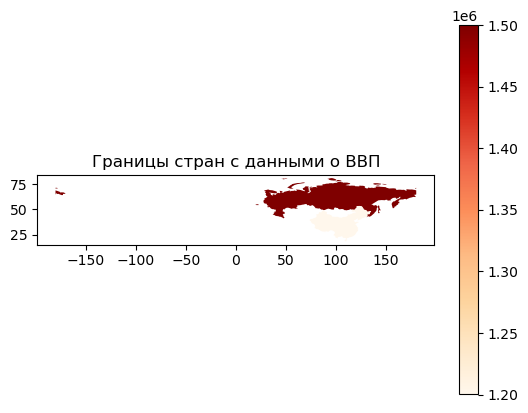

In [32]:
# Визуализация объединенных данных (GDP)
merged.plot(column='gdp', cmap='OrRd', legend=True)
plt.title("Границы стран с данными о ВВП")
plt.show()

## 2.6. Дополнительная информация

### 2.6.1. Поддержка различных форматов данных

### 2.6.2. Работа с большими данными

## 2.7. Задачи реального мира

### Задача 1: Определение ближайших объектов

In [33]:
# Загрузка данных о границах стран
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\k.valiev\AppData\Local\Temp\ipykernel_32596\3452834228.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [34]:
# Создание точки (например, местоположение пользователя)
user_location = Point(10, 52)

In [35]:
# Вычисление расстояния от каждой страны до этой точки
world['distance'] = world.geometry.distance(user_location)

C:\Users\k.valiev\AppData\Local\Temp\ipykernel_32596\2378129192.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['distance'] = world.geometry.distance(user_location)


In [36]:
# Нахождение ближайшей страны
nearest_country = world.loc[world['distance'].idxmin()]
print(f"Ближайшая страна: {nearest_country['name']}")

Ближайшая страна: Germany


### Задача 2: Определение покрытия территорий

In [37]:
# Заданные точки (например, вышки сотовой связи)
towers = gpd.GeoDataFrame({
    'geometry': [Point(5, 52), Point(10, 50), Point(15, 53)],
    'tower_id': [1, 2, 3]
})

In [38]:
# Создание буферов вокруг вышек (например, радиус 100 км)
towers['buffer'] = towers.buffer(1)  # Радиус 1 градус

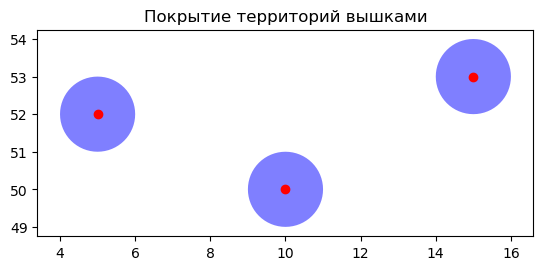

In [39]:
# Визуализация
fig, ax = plt.subplots()
towers['buffer'].plot(ax=ax, color='blue', alpha=0.5)
towers.plot(ax=ax, color='red')
plt.title('Покрытие территорий вышками')
plt.show()

## Домашнее задание

### Задание 1 (упрощенное):

### Задание 2 (сложное):

### Выводы

C:\Users\k.valiev\AppData\Local\Temp\ipykernel_32596\543144383.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


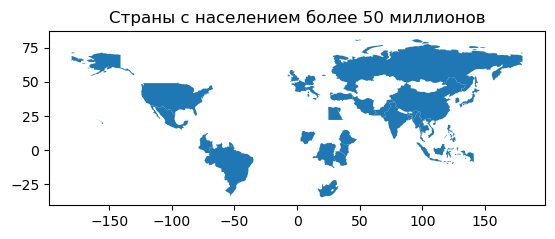

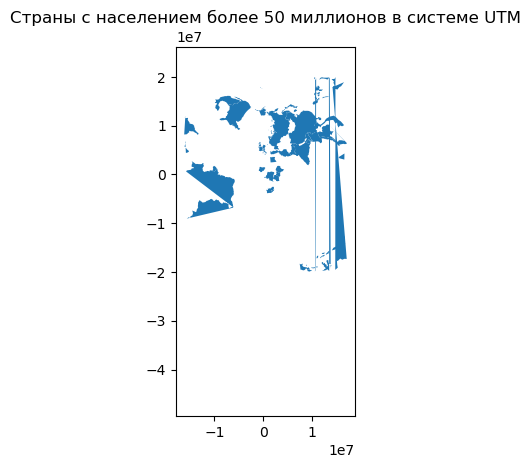

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Загрузка данных о границах стран
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Фильтрация стран с населением более 50 миллионов
large_countries = world[world['pop_est'] > 50000000]

# Визуализация стран
large_countries.plot()
plt.title("Страны с населением более 50 миллионов")
plt.show()

# Преобразование системы координат в UTM (зона 33N)
large_countries_utm = large_countries.to_crs(epsg=32633)

# Визуализация в новой системе координат
large_countries_utm.plot()
plt.title("Страны с населением более 50 миллионов в системе UTM")
plt.show()

C:\Users\k.valiev\AppData\Local\Temp\ipykernel_32596\3690141117.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\k.valiev\AppData\Local\Temp\ipykernel_32596\3690141117.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rich_countries['buffer'] = rich_countries.geometry.buffer(5)
C:\Users\k.valiev\AppData\Local\anaconda3\envs\geo\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

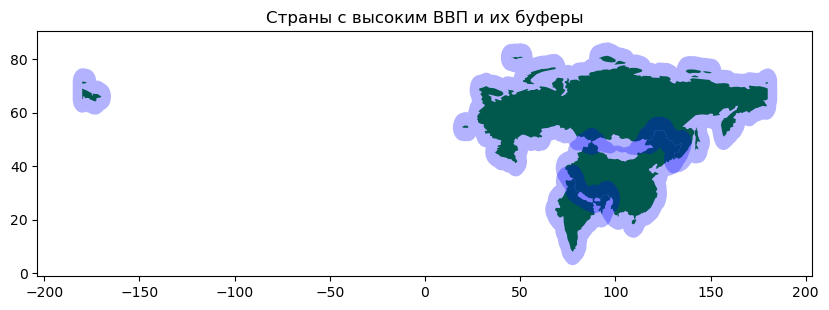

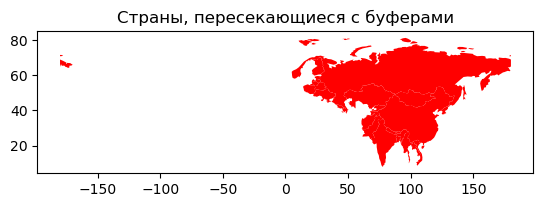

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Загрузка данных о границах стран
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Создание второго набора данных с ВВП
gdp_data = gpd.GeoDataFrame({
    'name': ['Russia', 'United States', 'China', 'India'],
    'gdp': [1500000, 21000000, 14000000, 2900000]
})

# Объединение наборов данных по имени страны
merged = world.merge(gdp_data, on='name', how='left')

# Фильтрация стран с ВВП более 1 триллиона
rich_countries = merged[merged['gdp'] > 1000000]

# Создание буферов вокруг стран с высоким ВВП
rich_countries['buffer'] = rich_countries.geometry.buffer(5)

# Визуализация стран и их буферов
fig, ax = plt.subplots(figsize=(10, 10))
rich_countries.plot(ax=ax, color='green')
rich_countries['buffer'].plot(ax=ax, color='blue', alpha=0.3)
plt.title("Страны с высоким ВВП и их буферы")
plt.show()

# Вычисление пересечений буферов с другими странами
intersecting_countries = world[world.intersects(rich_countries.unary_union)]
intersecting_countries.plot(color='red')
plt.title("Страны, пересекающиеся с буферами")
plt.show()